In [40]:
import os
import re
import cv2

import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

In [5]:
ROOT = "../../../diploma/data/saintgalldb-v1.0/"

In [6]:
!ls "{ROOT}"

README.txt   data         ground_truth sets


In [7]:
!ls "{ROOT}/sets"

test.txt  train.txt valid.txt


In [10]:
def get_ids(file):
    with open(os.path.join(ROOT, "sets", file), 'r') as f:
        ids = [l.strip() for l in f.readlines()]
        return ids
    
train_ids = get_ids('train.txt')
valid_ids = get_ids('valid.txt')
test_ids = get_ids('test.txt')

len(train_ids), len(valid_ids), len(test_ids)

(20, 10, 30)

In [11]:
train_ids[0]

'csg562-003'

In [17]:
def preprocess_text(text):
    return (
        text
        .replace('pt', '.')
        .replace('et', '&')
        .replace('-', '')
        .replace('|', ' ')
    )


def select_stage(page_id):
    if page_id in train_ids:
        stage = 'train'
    elif page_id in valid_ids:
        stage = 'valid'
    elif page_id in test_ids:
        stage = 'test'
    else:
        stage = 'unknown'
    return stage


def make_marking():
    marking = []
    with open(os.path.join(ROOT, 'ground_truth/transcription.txt'), 'r') as f:
        lines = f.readlines()
    
    for line in tqdm(lines):
        sample_id, txt, _ = line.split()
        txt = preprocess_text(txt)
        page_id = '-'.join(sample_id.split('-')[:2])
        stage = select_stage(page_id)
        
        marking.append({
            'sample_id': sample_id,
            'path': f'saintgall/images/{sample_id}.png',
            'stage': stage,
            'text': txt
        })
        
    marking = pd.DataFrame(marking).set_index('sample_id')
    return marking


marking = make_marking()
    
#     !cp '../input/SAINT-GALL/saintgalldb-v1.0/data/line_images_normalized/{sample_id}.png' 'prepared_datasets/saintgall/images/{sample_id}.png'
    
marking['stage'].value_counts()

100%|███████████████████████████████████████████████████████████████████████████████████| 1410/1410 [00:00<00:00, 125984.59it/s]


test     707
train    468
valid    235
Name: stage, dtype: int64

In [18]:
marking.head(3)

,path,stage,text
sample_id,,,
csg562-003-01,saintgall/images/csg562-003-01.png,train,versatio per omnem hiberniam celebris haberetu...
csg562-003-02,saintgall/images/csg562-003-02.png,train,didum ignei solis iubar singulari decore omniu...
csg562-003-03,saintgall/images/csg562-003-03.png,train,r& amorem. sicuti de eo priusquam nascer&ur pr...


In [20]:
!rm -rf 'prepared_datasets/saintgall'
os.makedirs('prepared_datasets/saintgall/images', exist_ok=True)

In [35]:
sfx = 'data/line_images_normalized/'
os.environ["__my_path"] = os.path.join(ROOT, sfx)
!find "${__my_path}" -type f -name "*.png" -exec cp {} "prepared_datasets/saintgall/images/" \;
del os.environ["__my_path"]


In [38]:
!ls prepared_datasets/saintgall/images/ | wc -l

    1410


Отлично, по числу совпало

sample_id: csg562-009-12
text: tidie pastus e dapibus scripturarum. Inter sacrae igitur
image_shape: (120, 1794, 3)


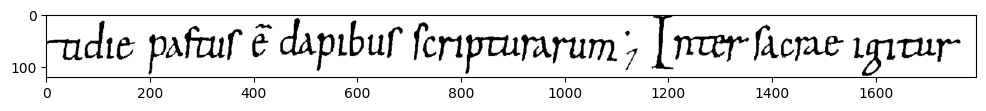

In [43]:
idx = 144

sample = marking.iloc[idx]
text = sample['text']
image = cv2.imread(f'./prepared_datasets/{sample["path"]}')

print('sample_id:', sample.name)
print('text:', text)
print('image_shape:', image.shape)

plt.figure(num=None, figsize=(12, 3))
plt.imshow(image);

In [44]:
marking.to_csv('./prepared_datasets/saintgall/marking.csv')

In [45]:
!ls ./prepared_datasets/saintgall

images      marking.csv


In [46]:
!cd ./prepared_datasets && tar -czvf saintgall.tar.gz saintgall > /dev/null

a saintgall
a saintgall/images
a saintgall/marking.csv
a saintgall/images/csg562-010-14.png
a saintgall/images/csg562-019-24.png
a saintgall/images/csg562-017-09.png
a saintgall/images/csg562-042-20.png
a saintgall/images/csg562-042-08.png
a saintgall/images/csg562-017-21.png
a saintgall/images/csg562-045-01.png
a saintgall/images/csg562-045-15.png
a saintgall/images/csg562-019-18.png
a saintgall/images/csg562-031-19.png
a saintgall/images/csg562-036-10.png
a saintgall/images/csg562-064-24.png
a saintgall/images/csg562-036-04.png
a saintgall/images/csg562-063-05.png
a saintgall/images/csg562-038-01.png
a saintgall/images/csg562-038-15.png
a saintgall/images/csg562-064-18.png
a saintgall/images/csg562-063-11.png
a saintgall/images/csg562-009-21.png
a saintgall/images/csg562-007-18.png
a saintgall/images/csg562-055-10.png
a saintgall/images/csg562-007-24.png
a saintgall/images/csg562-009-09.png
a saintgall/images/csg562-055-04.png
a saintgall/images/csg562-026-01.png
a saintgall/images/c

a saintgall/images/csg562-026-06.png
a saintgall/images/csg562-026-12.png
a saintgall/images/csg562-028-17.png
a saintgall/images/csg562-028-03.png
a saintgall/images/csg562-055-17.png
a saintgall/images/csg562-055-03.png
a saintgall/images/csg562-007-23.png
a saintgall/images/csg562-036-17.png
a saintgall/images/csg562-036-03.png
a saintgall/images/csg562-064-23.png
a saintgall/images/csg562-063-02.png
a saintgall/images/csg562-031-22.png
a saintgall/images/csg562-038-06.png
a saintgall/images/csg562-038-12.png
a saintgall/images/csg562-063-16.png
a saintgall/images/csg562-010-13.png
a saintgall/images/csg562-019-23.png
a saintgall/images/csg562-010-07.png
a saintgall/images/csg562-045-06.png
a saintgall/images/csg562-045-12.png
a saintgall/images/csg562-019-09.png
a saintgall/images/csg562-017-24.png
a saintgall/images/csg562-045-04.png
a saintgall/images/csg562-042-19.png
a saintgall/images/csg562-045-10.png
a saintgall/images/csg562-017-18.png
a saintgall/images/csg562-010-11.png
a

a saintgall/images/csg562-035-20.png
a saintgall/images/csg562-032-15.png
a saintgall/images/csg562-035-08.png
a saintgall/images/csg562-060-21.png
a saintgall/images/csg562-032-01.png
a saintgall/images/csg562-041-04.png
a saintgall/images/csg562-048-20.png
a saintgall/images/csg562-046-19.png
a saintgall/images/csg562-041-10.png
a saintgall/images/csg562-013-18.png
a saintgall/images/csg562-014-11.png
a saintgall/images/csg562-048-08.png
a saintgall/images/csg562-014-05.png
a saintgall/images/csg562-022-04.png
a saintgall/images/csg562-022-10.png
a saintgall/images/csg562-025-19.png
a saintgall/images/csg562-056-08.png
a saintgall/images/csg562-056-20.png
a saintgall/images/csg562-003-09.png
a saintgall/images/csg562-004-14.png
a saintgall/images/csg562-058-19.png
a saintgall/images/csg562-058-21.png
a saintgall/images/csg562-056-18.png
a saintgall/images/csg562-004-10.png
a saintgall/images/csg562-004-04.png
a saintgall/images/csg562-058-09.png
a saintgall/images/csg562-025-21.png
a

a saintgall/images/csg562-014-19.png
a saintgall/images/csg562-048-14.png
a saintgall/images/csg562-013-10.png
a saintgall/images/csg562-013-04.png
a saintgall/images/csg562-041-24.png
a saintgall/images/csg562-060-01.png
a saintgall/images/csg562-032-21.png
a saintgall/images/csg562-060-15.png
a saintgall/images/csg562-035-14.png
a saintgall/images/csg562-032-09.png
a saintgall/images/csg562-043-09.png
a saintgall/images/csg562-016-20.png
a saintgall/images/csg562-018-19.png
a saintgall/images/csg562-044-14.png
a saintgall/images/csg562-011-15.png
a saintgall/images/csg562-016-08.png
a saintgall/images/csg562-011-01.png
a saintgall/images/csg562-043-21.png
a saintgall/images/csg562-062-04.png
a saintgall/images/csg562-030-24.png
a saintgall/images/csg562-065-19.png
a saintgall/images/csg562-039-14.png
a saintgall/images/csg562-062-10.png
a saintgall/images/csg562-030-18.png
a saintgall/images/csg562-037-11.png
a saintgall/images/csg562-037-05.png
a saintgall/images/csg562-054-11.png
a

a saintgall/images/csg562-025-02.png
a saintgall/images/csg562-025-16.png
a saintgall/images/csg562-056-13.png
a saintgall/images/csg562-056-07.png
a saintgall/images/csg562-003-06.png
a saintgall/images/csg562-058-02.png
a saintgall/images/csg562-058-16.png
a saintgall/images/csg562-003-12.png
a saintgall/images/csg562-042-15.png
a saintgall/images/csg562-019-11.png
a saintgall/images/csg562-045-08.png
a saintgall/images/csg562-019-05.png
a saintgall/images/csg562-010-21.png
a saintgall/images/csg562-042-01.png
a saintgall/images/csg562-010-09.png
a saintgall/images/csg562-045-20.png
a saintgall/images/csg562-017-14.png
a saintgall/images/csg562-063-18.png
a saintgall/images/csg562-064-11.png
a saintgall/images/csg562-038-08.png
a saintgall/images/csg562-064-05.png
a saintgall/images/csg562-031-04.png
a saintgall/images/csg562-038-20.png
a saintgall/images/csg562-036-19.png
a saintgall/images/csg562-031-10.png
a saintgall/images/csg562-009-14.png
a saintgall/images/csg562-055-19.png
a

a saintgall/images/csg562-045-19.png
a saintgall/images/csg562-042-10.png
a saintgall/images/csg562-010-24.png
a saintgall/images/csg562-042-04.png
a saintgall/images/csg562-036-08.png
a saintgall/images/csg562-063-21.png
a saintgall/images/csg562-031-01.png
a saintgall/images/csg562-031-15.png
a saintgall/images/csg562-064-14.png
a saintgall/images/csg562-038-19.png
a saintgall/images/csg562-063-09.png
a saintgall/images/csg562-036-20.png
a saintgall/images/csg562-007-14.png
a saintgall/images/csg562-055-20.png
a saintgall/images/csg562-055-08.png
a saintgall/images/csg562-009-05.png
a saintgall/images/csg562-009-11.png
a saintgall/images/csg562-021-10.png
a saintgall/images/csg562-026-19.png
a saintgall/images/csg562-028-20.png
a saintgall/images/csg562-021-04.png
a saintgall/images/csg562-028-08.png
a saintgall/images/csg562-005-11.png
a saintgall/images/csg562-059-08.png
a saintgall/images/csg562-005-05.png
a saintgall/images/csg562-059-20.png
a saintgall/images/csg562-050-04.png
a

In [47]:
!du -sh ./prepared_datasets/saintgall.tar.gz


5.6M	./prepared_datasets/saintgall.tar.gz


In [48]:
chars = set()
for text in marking['text']:
    chars.update(text)
    
''.join(sorted(list(chars)))

' &.ABCDEFGHILMNOPQRSTUVXZabcdefghiklmnopqrstuvwxyz'